In [1]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [2]:
%cd grade_prediction/
%pwd

/home/yuhao/grade_prediction


'/home/yuhao/grade_prediction'

In [3]:
import numpy as np
import shap

shap.initjs()

In [4]:
from ml.dataset import load_student_grade_dataset
from ml.model import PytorchModelManager

dataset = load_student_grade_dataset()
model_manager = PytorchModelManager(dataset)

model_manager.train(epoch=80)

Epoch: 0, loss=0.614, train_accuracy=0.297, test_accuracy=0.190
Epoch: 1, loss=0.596, train_accuracy=0.389, test_accuracy=0.278
Epoch: 2, loss=0.546, train_accuracy=0.351, test_accuracy=0.304
Epoch: 3, loss=0.528, train_accuracy=0.415, test_accuracy=0.253
Epoch: 4, loss=0.541, train_accuracy=0.446, test_accuracy=0.266
Epoch: 5, loss=0.554, train_accuracy=0.481, test_accuracy=0.304
Epoch: 6, loss=0.535, train_accuracy=0.478, test_accuracy=0.367
Epoch: 7, loss=0.587, train_accuracy=0.516, test_accuracy=0.342
Epoch: 8, loss=0.534, train_accuracy=0.513, test_accuracy=0.329
Epoch: 9, loss=0.529, train_accuracy=0.557, test_accuracy=0.342
Epoch: 10, loss=0.563, train_accuracy=0.532, test_accuracy=0.354
Epoch: 11, loss=0.536, train_accuracy=0.570, test_accuracy=0.354
Epoch: 12, loss=0.532, train_accuracy=0.630, test_accuracy=0.354
Epoch: 13, loss=0.463, train_accuracy=0.620, test_accuracy=0.380
Epoch: 14, loss=0.478, train_accuracy=0.608, test_accuracy=0.418
Epoch: 15, loss=0.472, train_accura

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

In [5]:
X_train = dataset.get_train_X()
y_train = dataset.get_train_y()
X_test = dataset.get_test_X()
y_test = dataset.get_test_y()

### Predict probability function of class A
D, C, A, B

In [25]:
def predict_proba(X_df):
    X = torch.from_numpy(X_df).float()
    return model_manager.forward(X).detach().numpy()

In [26]:
from shap import Explainer

In [27]:
explainer = shap.Explainer(predict_proba, X_train.values)
shap_values = explainer(X_test.iloc[0:1,:])

In [47]:
len(shap_values)

1

In [28]:
shap_values[0]

.values =
array([[ 3.13608225e-04, -4.19210090e-04, -2.82809910e-03,
         2.02183404e-03],
       [-1.07701158e-03, -1.30821101e-03,  2.44503228e-03,
         5.87675116e-04],
       [ 2.33380346e-03,  3.81953165e-03, -2.74024428e-02,
         1.37091422e-02],
       [-2.09510805e-03, -3.40508713e-03,  1.28085190e-02,
        -6.68403422e-03],
       [ 2.14620304e-03,  8.02982128e-04, -1.18948059e-02,
         6.66970085e-03],
       [-1.35098811e-03,  5.83897519e-03, -3.67322312e-03,
         1.86911568e-03],
       [-7.35597074e-03,  3.64394739e-03,  9.86816561e-03,
        -3.33089100e-03],
       [ 2.07075492e-03,  8.46251530e-04, -1.59338506e-02,
         1.10944677e-02],
       [-1.11568457e-03, -5.24156189e-03,  3.18477981e-02,
        -2.12197282e-02],
       [-3.66666809e-04,  2.66980066e-03,  1.63709375e-02,
        -1.61584351e-02],
       [ 3.08780760e-05,  1.25965879e-03, -2.65772807e-04,
        -1.77140348e-03],
       [ 1.18893454e-03, -8.35199221e-03,  2.79413465e-

In [48]:
type(shap_values[0][:, 2])

shap._explanation.Explanation

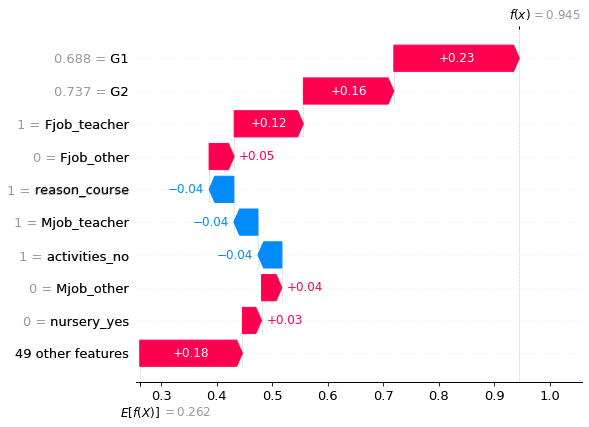

In [46]:
shap.plots.waterfall(shap_values[0][:, 2])

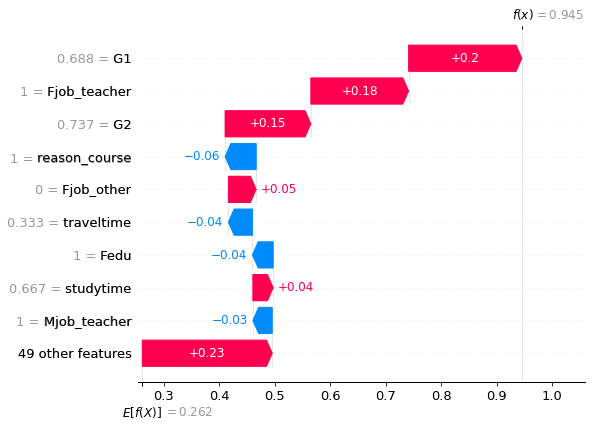

In [21]:
shap.plots.waterfall(shap_values[0])

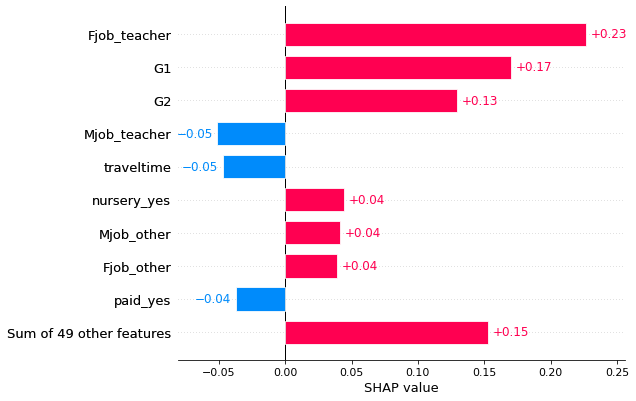

In [11]:
shap.plots.bar(shap_values[0])

In [105]:
X_test.iloc[:1]

,school_GP,school_MS,sex_F,sex_M,age,address_U,address_R,famsize_GT3,famsize_LE3,Pstatus_A,...,romantic_yes,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
329,1,0,1,0,0.285714,1,0,1,0,0,...,1,0.75,0.5,0.5,0.0,0.25,0.75,0.053333,0.6875,0.736842


In [111]:
valid_features = X_test.iloc[0] > 0
valid_feature_names = [dataset.dummy_features[i] for i in range(len(dataset.dummy_features)) if valid_features[i]]
valid_feature_names

['school_GP',
 'sex_F',
 'age',
 'address_U',
 'famsize_GT3',
 'Pstatus_T',
 'Medu',
 'Fedu',
 'Mjob_teacher',
 'Fjob_teacher',
 'reason_course',
 'guardian_mother',
 'traveltime',
 'studytime',
 'schoolsup_no',
 'famsup_yes',
 'paid_yes',
 'activities_no',
 'nursery_no',
 'higher_yes',
 'internet_yes',
 'romantic_yes',
 'famrel',
 'freetime',
 'goout',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2']

In [116]:
shap_df = pd.DataFrame([shap_values[0].values[valid_features]], columns=valid_feature_names)
shap_df.transpose()

,0
school_GP,-0.004950
sex_F,-0.036934
age,-0.008727
address_U,-0.004588
famsize_GT3,-0.010693
Pstatus_T,-0.002218
Medu,0.019478
Fedu,-0.020126
Mjob_teacher,-0.044701
Fjob_teacher,0.161695


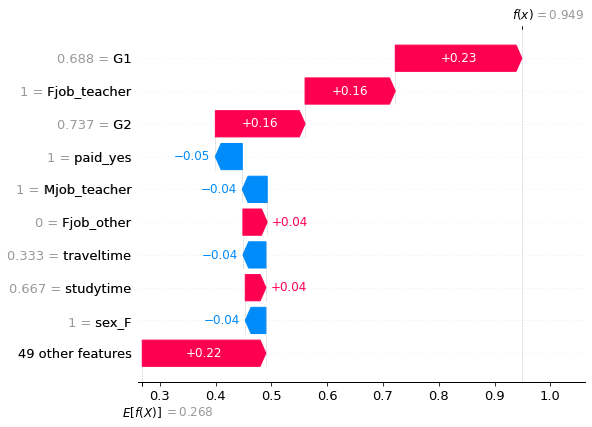

In [119]:
shap.plots.waterfall(shap_values[0])
